In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import datetime

df = pd.read_csv('../data_col/FinalDataSet.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [74]:
df.head()

,Name,Platform,Year,Genre,Publisher,DateSortie,Studio,Score,Rate,Review,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,GK_licence,GK_distributeur
0,Wii Sports,Wii,2006.0,Sports,Nintendo,2006-11-01,Nintendo,7.6,7.05,210.0,41.49,29.02,3.77,8.46,82.74,Wii Sports,Nintendo
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,NaN,Nintendo,7.0,8.40,235.0,29.08,3.58,6.81,0.77,40.24,Mario,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,2008-04-01,Nintendo,7.6,8.00,319.0,15.85,12.88,3.79,3.31,35.82,Mario,NaN
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,2009-07-01,Nintendo,7.5,7.35,103.0,15.75,11.01,3.28,2.96,33.00,Wii Sports,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,NaN,Nintendo,7.0,8.20,138.0,11.27,8.89,10.22,1.00,31.37,PokǸmon,NaN


In [75]:
def uniques(serie):
    unique = serie.unique()
    return len(unique)

# ANALYSE PAR PLATEFORME

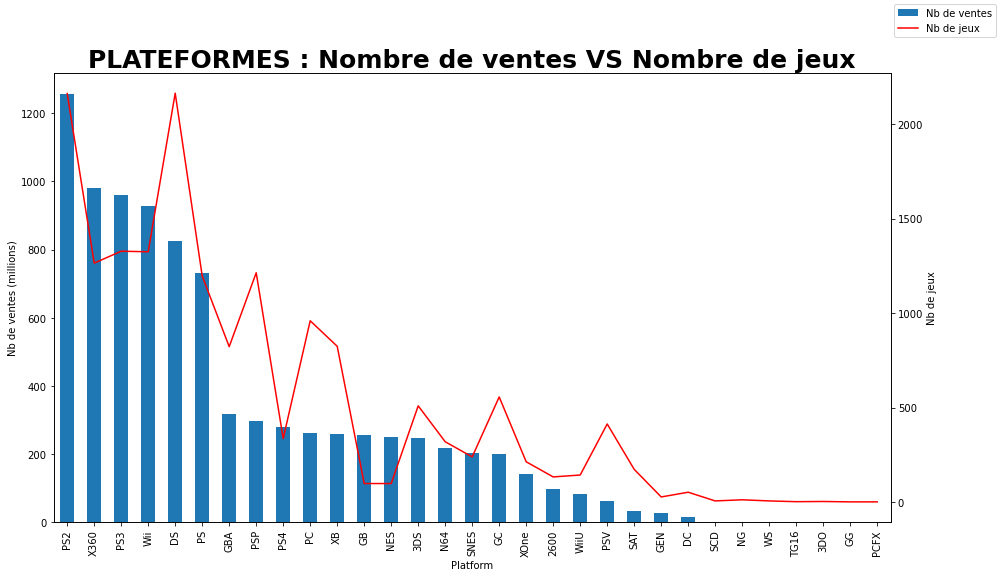

In [92]:
df_platform = df.groupby('Platform').agg({'Global_Sales': 'sum', 'Name': uniques}).reset_index().sort_values(by = ['Global_Sales'], ascending=False)

fig, ax = plt.subplots()
fig.set_size_inches(15, 8.27)
ax2 = plt.twinx()

df_platform.plot.bar(
    x='Platform',
    y='Global_Sales',
    ax=ax,
    ylabel='Nb de ventes (millions)',
    label='Nb de ventes',
    legend=None
)

df_platform.plot(
    x='Platform',
    y='Name',
    ax=ax2,
    c='red',
    ylabel='Nb de jeux',
    label='Nb de jeux',
    legend=None
)

lines = []
labels = []

for ax in fig.axes:
    axLine, axLabel = ax.get_legend_handles_labels()
    lines.extend(axLine)
    labels.extend(axLabel)

fig.legend(lines, labels,           
           loc = 'upper right')


plt.title('PLATEFORMES : Nombre de ventes VS Nombre de jeux', weight='bold', fontsize=25);

# ANALYSE PAR GENRE

## Clasement des genres qui vendent le plus comparé à leur nombre de jeux

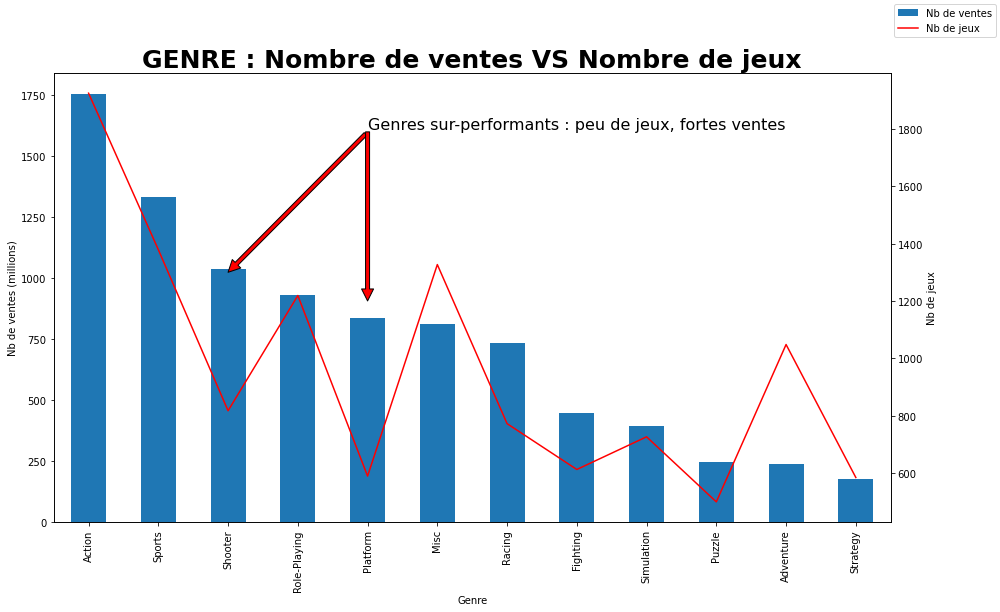

In [100]:
df_genre = df.groupby('Genre').agg({'Global_Sales': 'sum', 'Name': uniques}).reset_index().sort_values(by = ['Global_Sales'], ascending=False)

fig, ax = plt.subplots()
fig.set_size_inches(15, 8.27)
ax2 = plt.twinx()

df_genre.plot.bar(
    x='Genre',
    y='Global_Sales',
    ax=ax,
    ylabel='Nb de ventes (millions)',
    label='Nb de ventes',
    legend=None
)

df_genre.plot(
    x='Genre',
    y='Name',
    ax=ax2,
    c='red',
    ylabel='Nb de jeux',
    label='Nb de jeux',
    legend=None
)

lines = []
labels = []

for ax in fig.axes:
    axLine, axLabel = ax.get_legend_handles_labels()
    lines.extend(axLine)
    labels.extend(axLabel)

fig.legend(lines, labels,           
           loc = 'upper right')


plt.annotate('Genres sur-performants : peu de jeux, fortes ventes', xy=(2, 1300), xytext=(4, 1800), fontsize = 16,
            arrowprops={'facecolor':'red'} )
plt.annotate('', xy=(4, 1200), xytext=(4, 1790),
            arrowprops={'facecolor':'red'} )


plt.title('GENRE : Nombre de ventes VS Nombre de jeux', weight='bold', fontsize=25);

## Clasement des genres qui vendent le plus comparé à leurs notes

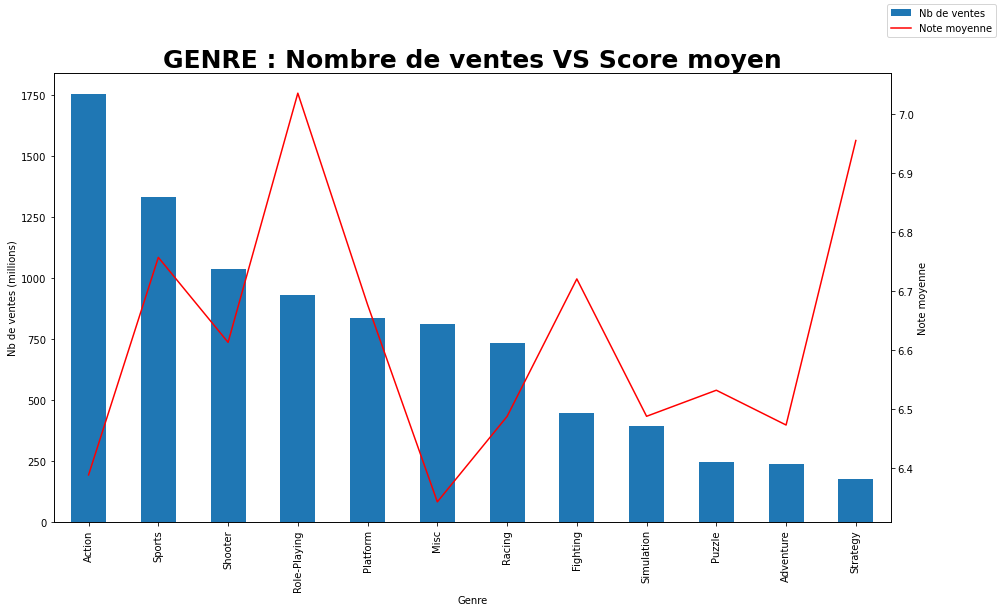

In [78]:
df_genre = df.groupby('Genre').agg({'Global_Sales': 'sum', 'Score': 'mean', 'Rate':'mean'}).reset_index().sort_values(by = ['Global_Sales'], ascending=False)
df_genre['Score_Rate'] = (df_genre['Score'] + df_genre['Rate']) / 2

fig, ax = plt.subplots()
fig.set_size_inches(15, 8.27)
ax2 = plt.twinx()

df_genre.plot.bar(
    x='Genre',
    y='Global_Sales',
    ax=ax,
    ylabel='Nb de ventes (millions)',
    label='Nb de ventes',
    legend=None
)

df_genre.plot(
    x='Genre',
    y='Score_Rate',
    ax=ax2,
    c='red',
    ylabel='Note moyenne',
    label = 'Note moyenne',
    legend=None
)

lines = []
labels = []

for ax in fig.axes:
    axLine, axLabel = ax.get_legend_handles_labels()
    lines.extend(axLine)
    labels.extend(axLabel)

fig.legend(lines, labels,           
           loc = 'upper right')

plt.title('GENRE : Nombre de ventes VS Score moyen', weight='bold', fontsize=25);

# ANALYSE PAR ÉDITEUR

## TOP 20 des éditeurs qui vendent le plus comparé à leur nb de jeux

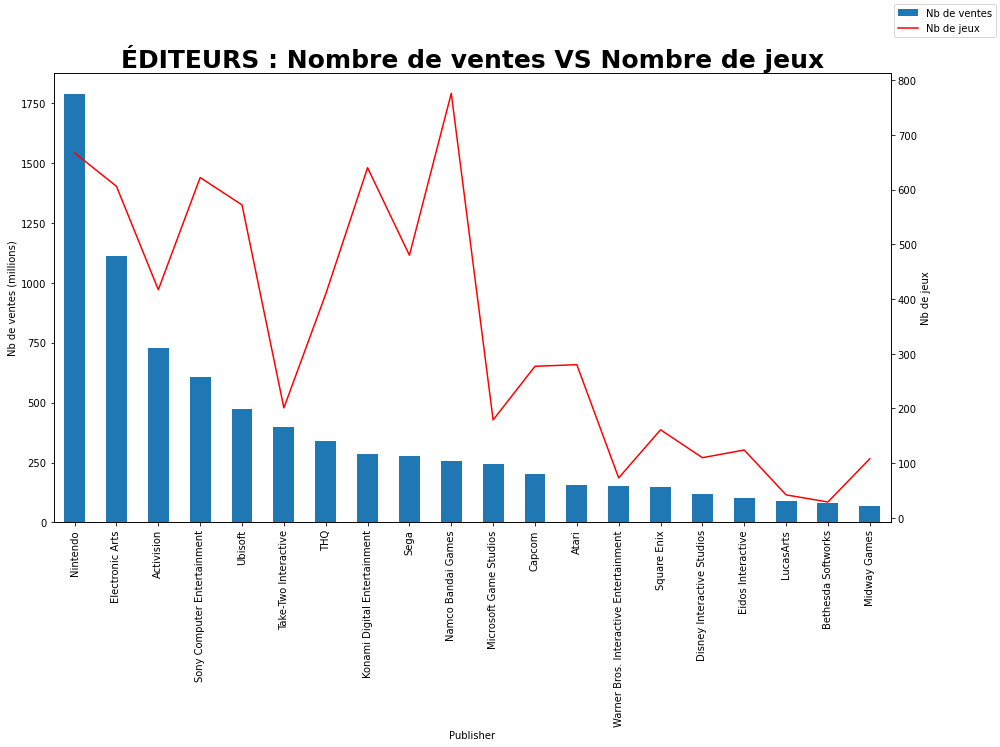

In [79]:
df_publisher = df.groupby('Publisher').agg({'Global_Sales': 'sum', 'Name': uniques}).reset_index().sort_values(by = ['Global_Sales'], ascending=False)

fig, ax = plt.subplots()
fig.set_size_inches(15, 8.27)
ax2 = plt.twinx()

df_publisher.head(20).plot.bar(
    x='Publisher',
    y='Global_Sales',
    ax=ax,
    ylabel='Nb de ventes (millions)',
    label='Nb de ventes',
    legend=None
)

df_publisher.head(20).plot(
    x='Publisher',
    y='Name',
    ax=ax2,
    c='red',
    ylabel='Nb de jeux',
    label='Nb de jeux',
    legend=None
)

lines = []
labels = []

for ax in fig.axes:
    axLine, axLabel = ax.get_legend_handles_labels()
    lines.extend(axLine)
    labels.extend(axLabel)

fig.legend(lines, labels,           
           loc = 'upper right')


plt.title('ÉDITEURS : Nombre de ventes VS Nombre de jeux', weight='bold', fontsize=25);

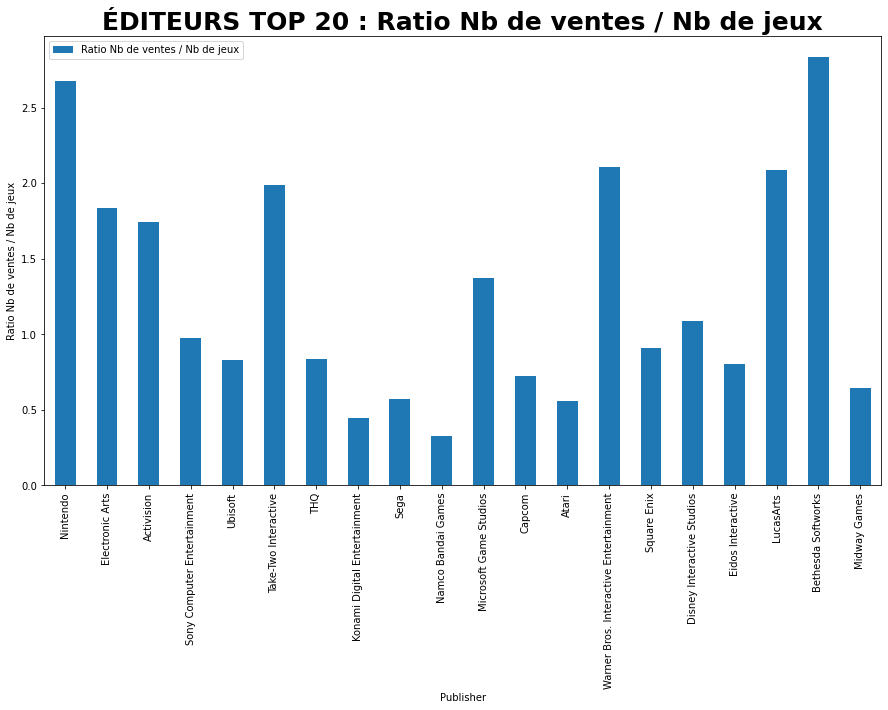

In [114]:
df_publisher = df.groupby('Publisher').agg({'Global_Sales': 'sum', 'Name': uniques}).reset_index().sort_values(by = ['Global_Sales'], ascending=False)
df_publisher['Ratio'] = df_publisher['Global_Sales'] / df_publisher['Name']

fig, ax = plt.subplots()
fig.set_size_inches(15, 8.27)

df_publisher.head(20).plot.bar(
    x='Publisher',
    y='Ratio',
    ax=ax,
    ylabel='Ratio Nb de ventes / Nb de jeux',
    label='Ratio Nb de ventes / Nb de jeux',
)


plt.title('ÉDITEURS TOP 20 : Ratio Nb de ventes / Nb de jeux', weight='bold', fontsize=25);

Parmi le Top 20 des éditeurs qui vendent le plus, on voit que Bethesda Softworks et Nintendo performent le plus avec plus de 2,5 millions de ventes par jeu sorti.

## TOP 20 des éditeurs qui vendent le plus comparé à leur note moyenne

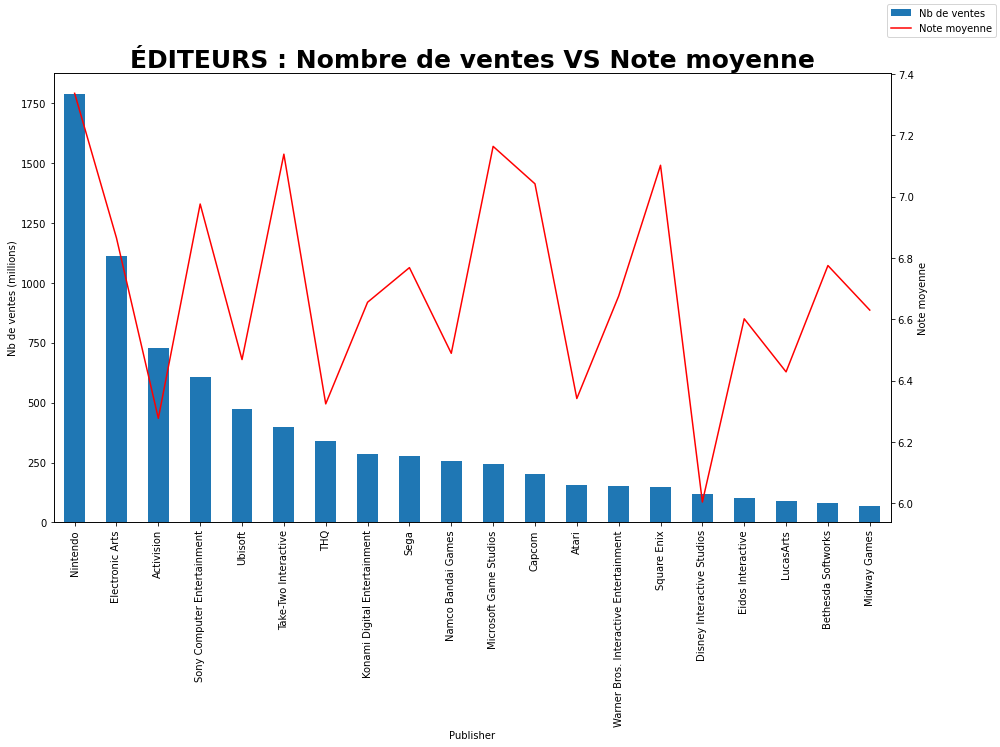

In [80]:
df_publisher = df.groupby('Publisher').agg({'Global_Sales': 'sum', 'Score': 'mean', 'Rate':'mean'}).reset_index().sort_values(by = ['Global_Sales'], ascending=False)
df_publisher['Score_Rate'] = (df_publisher['Score'] + df_publisher['Rate']) / 2
df_publisher.sort_values(by=[])

fig, ax = plt.subplots()
fig.set_size_inches(15, 8.27)
ax2 = plt.twinx()

df_publisher.head(20).plot.bar(
    x='Publisher',
    y='Global_Sales',
    ax=ax,
    ylabel='Nb de ventes (millions)',
    label='Nb de ventes',
    legend=None
)

df_publisher.head(20).plot(
    x='Publisher',
    y='Score_Rate',
    ax=ax2,
    c='red',
    ylabel='Note moyenne',
    label='Note moyenne',
    legend=None
)

lines = []
labels = []

for ax in fig.axes:
    axLine, axLabel = ax.get_legend_handles_labels()
    lines.extend(axLine)
    labels.extend(axLabel)

fig.legend(lines, labels,           
           loc = 'upper right')

plt.title('ÉDITEURS : Nombre de ventes VS Note moyenne', weight='bold', fontsize=25);

# ANALYSE PAR STUDIO

## TOP 20 des studios qui vendent le plus comparé à leur nombre de jeux

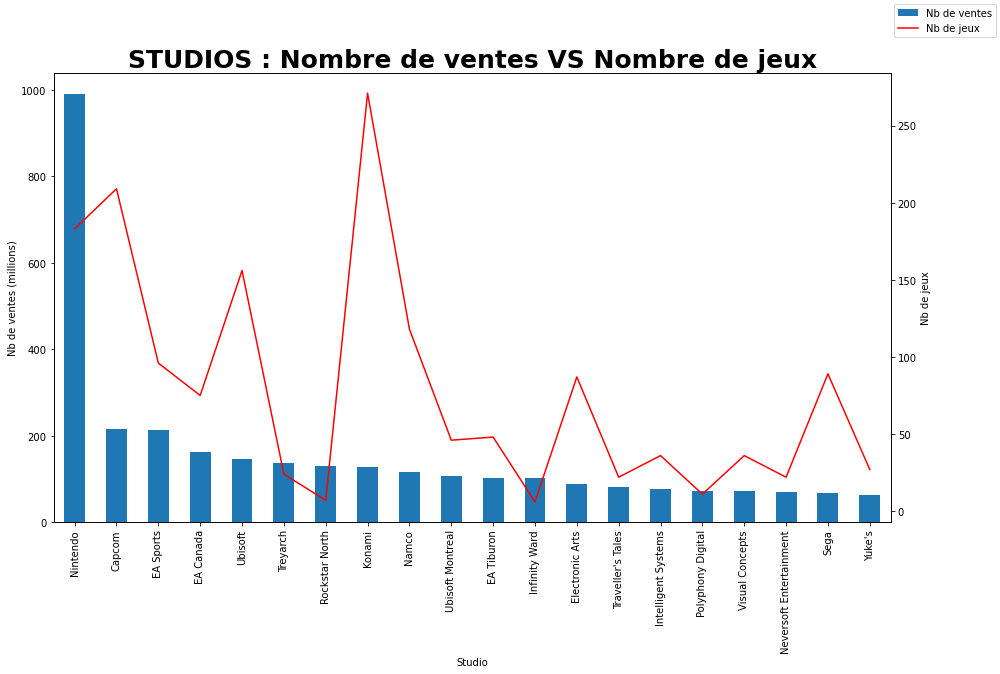

In [81]:
df_studio = df.groupby('Studio').agg({'Global_Sales': 'sum', 'Name': uniques}).reset_index().sort_values(by = ['Global_Sales'], ascending=False)

fig, ax = plt.subplots()
fig.set_size_inches(15, 8.27)
ax2 = plt.twinx()

df_studio.head(20).plot.bar(
    x='Studio',
    y='Global_Sales',
    ax=ax,
    ylabel='Nb de ventes (millions)',
    label='Nb de ventes',
    legend=None
)

df_studio.head(20).plot(
    x='Studio',
    y='Name',
    ax=ax2,
    c='red',
    ylabel='Nb de jeux',
    label='Nb de jeux',
    legend=None
)

lines = []
labels = []

for ax in fig.axes:
    axLine, axLabel = ax.get_legend_handles_labels()
    lines.extend(axLine)
    labels.extend(axLabel)

fig.legend(lines, labels,           
           loc = 'upper right')

plt.title('STUDIOS : Nombre de ventes VS Nombre de jeux', weight='bold', fontsize=25);

Le Studio Nintendo écrase la concurrence avec 5 fois plus de jeux vendus que les 2 suivants sur le podium.<br>
A titre de comparaison, Capcom et Konami, qui sortent plus de jeux, en vendent largement moins.

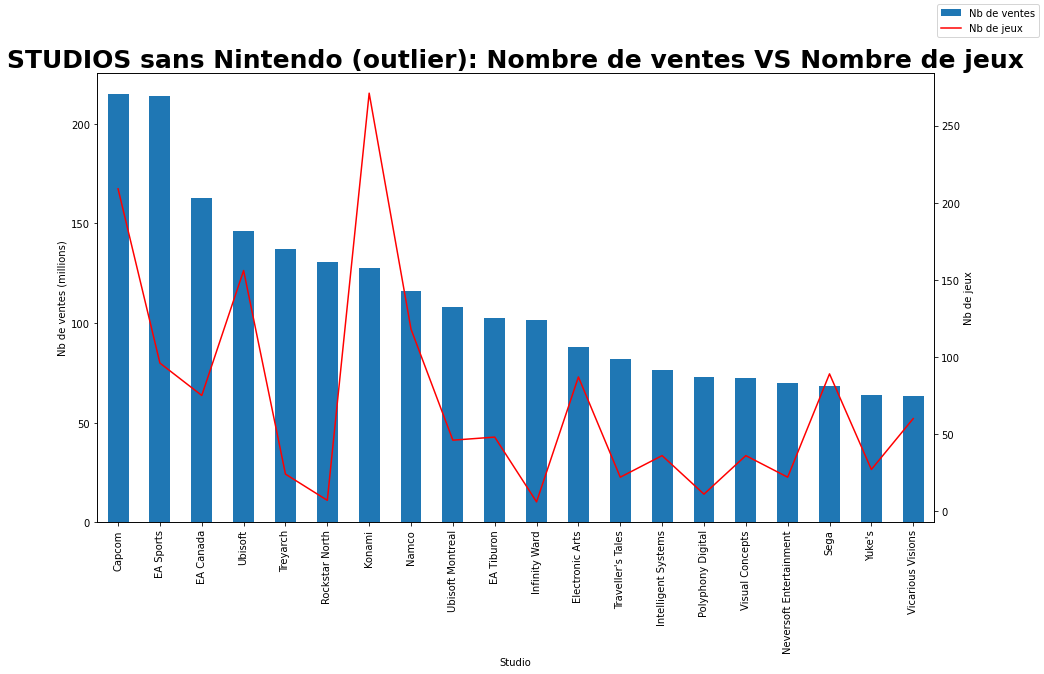

In [82]:
df_studio = df.groupby('Studio').agg({'Global_Sales': 'sum', 'Name': uniques}).reset_index().sort_values(by = ['Global_Sales'], ascending=False)

fig, ax = plt.subplots()
fig.set_size_inches(15, 8.27)
ax2 = plt.twinx()

df_studio.iloc[1:21,:].plot.bar(
    x='Studio',
    y='Global_Sales',
    ax=ax,
    ylabel='Nb de ventes (millions)',
    label='Nb de ventes',
    legend=None
)

df_studio.iloc[1:21,:].plot(
    x='Studio',
    y='Name',
    ax=ax2,
    c='red',
    ylabel='Nb de jeux',
    label='Nb de jeux',
    legend=None
)

lines = []
labels = []

for ax in fig.axes:
    axLine, axLabel = ax.get_legend_handles_labels()
    lines.extend(axLine)
    labels.extend(axLabel)

fig.legend(lines, labels,           
           loc = 'upper right')

plt.title('STUDIOS sans Nintendo (outlier): Nombre de ventes VS Nombre de jeux', weight='bold', fontsize=25);

## TOP 20 des studios qui vendent le plus comparé à leur note moyenne

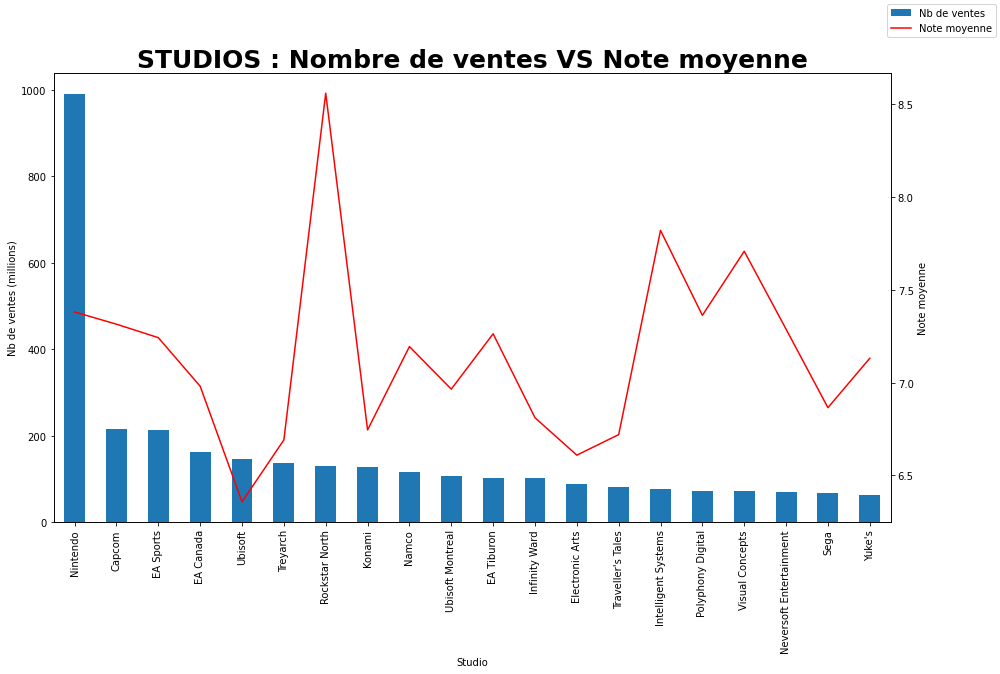

In [83]:
df_studio = df.groupby('Studio').agg({'Global_Sales': 'sum', 'Score': 'mean', 'Rate':'mean'}).reset_index().sort_values(by = ['Global_Sales'], ascending=False)
df_studio['Score_Rate'] = (df_studio['Score'] + df_studio['Rate']) / 2

fig, ax = plt.subplots()
fig.set_size_inches(15, 8.27)
ax2 = plt.twinx()

df_studio.head(20).plot.bar(
    x='Studio',
    y='Global_Sales',
    ax=ax,
    ylabel='Nb de ventes (millions)',
    label='Nb de ventes',
    legend=None
)

df_studio.head(20).plot(
    x='Studio',
    y='Score_Rate',
    ax=ax2,
    c='red',
    ylabel='Note moyenne',
    label='Note moyenne',
    legend=None
)

lines = []
labels = []

for ax in fig.axes:
    axLine, axLabel = ax.get_legend_handles_labels()
    lines.extend(axLine)
    labels.extend(axLabel)

fig.legend(lines, labels,           
           loc = 'upper right')

plt.title('STUDIOS : Nombre de ventes VS Note moyenne', weight='bold', fontsize=25);

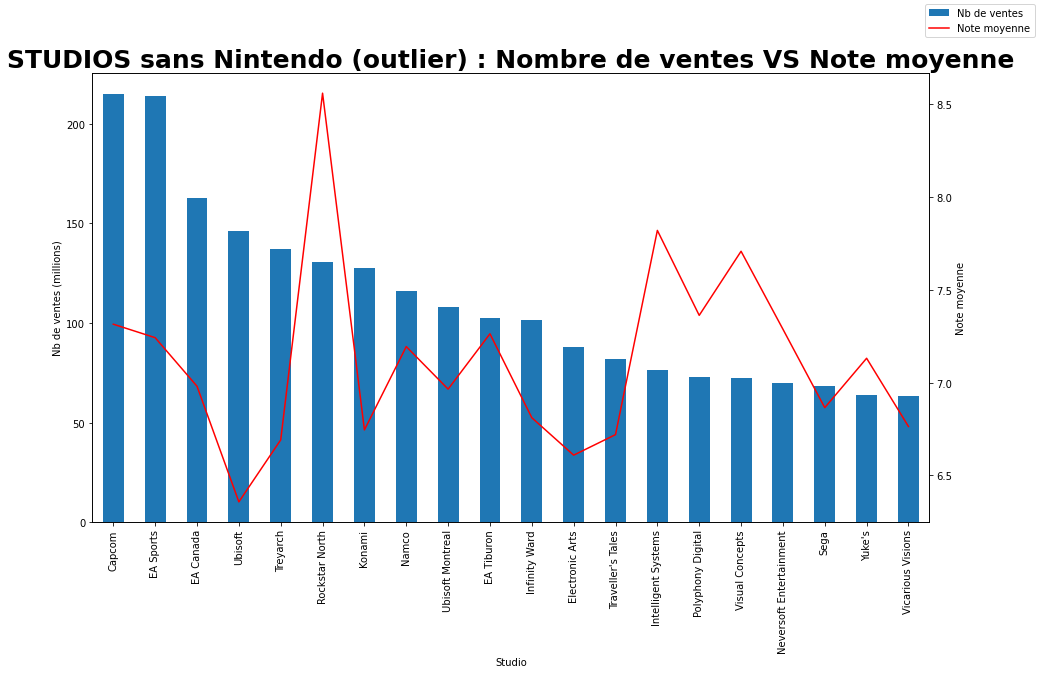

In [84]:
df_studio = df.groupby('Studio').agg({'Global_Sales': 'sum', 'Score': 'mean', 'Rate':'mean'}).reset_index().sort_values(by = ['Global_Sales'], ascending=False)
df_studio['Score_Rate'] = (df_studio['Score'] + df_studio['Rate']) / 2

fig, ax = plt.subplots()
fig.set_size_inches(15, 8.27)
ax2 = plt.twinx()

df_studio.iloc[1:21,:].plot.bar(
    x='Studio',
    y='Global_Sales',
    ax=ax,
    ylabel='Nb de ventes (millions)',
    label='Nb de ventes',
    legend=None
)

df_studio.iloc[1:21,:].plot(
    x='Studio',
    y='Score_Rate',
    ax=ax2,
    c='red',
    ylabel='Note moyenne',
    label='Note moyenne',
    legend=None
)

lines = []
labels = []

for ax in fig.axes:
    axLine, axLabel = ax.get_legend_handles_labels()
    lines.extend(axLine)
    labels.extend(axLabel)

fig.legend(lines, labels,           
           loc = 'upper right')

plt.title('STUDIOS sans Nintendo (outlier) : Nombre de ventes VS Note moyenne', weight='bold', fontsize=25);

## Évolution des ventes cumulées chez Nintendo

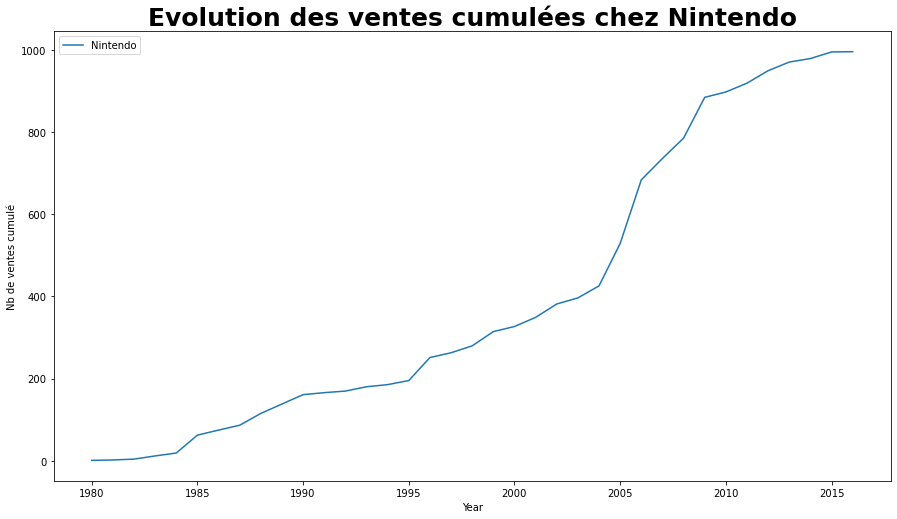

In [85]:
df_nintendo = df[df['Studio'].str.contains('Nintendo', na=False)].sort_values(by=['DateSortie'])
df_nintendo = df_nintendo.groupby('Year').agg({'Global_Sales': 'sum'}).reset_index().sort_values(by='Year')
df_nintendo['GS_cum'] = df_nintendo['Global_Sales'].cumsum()

fig, ax = plt.subplots()
fig.set_size_inches(15, 8.27)

df_nintendo.plot(x='Year', y='GS_cum', label='Nintendo', ax=ax)

plt.ylabel('Nb de ventes cumulé')
plt.legend()
plt.title("Evolution des ventes cumulées chez Nintendo", weight='bold', fontsize=25);

Le Studio Nintendo existe depuis les années 80, ce qui explique en partie son succès. <br>
On peut noter une forte accélération des ventes entre 2005 et 2010, dû en grande partie au succès de la Wii (sortie en 2006)

## Évolution des ventes cumulées chez les 2 autres studios du top 3
### Nb de ventes totales > 200 millions

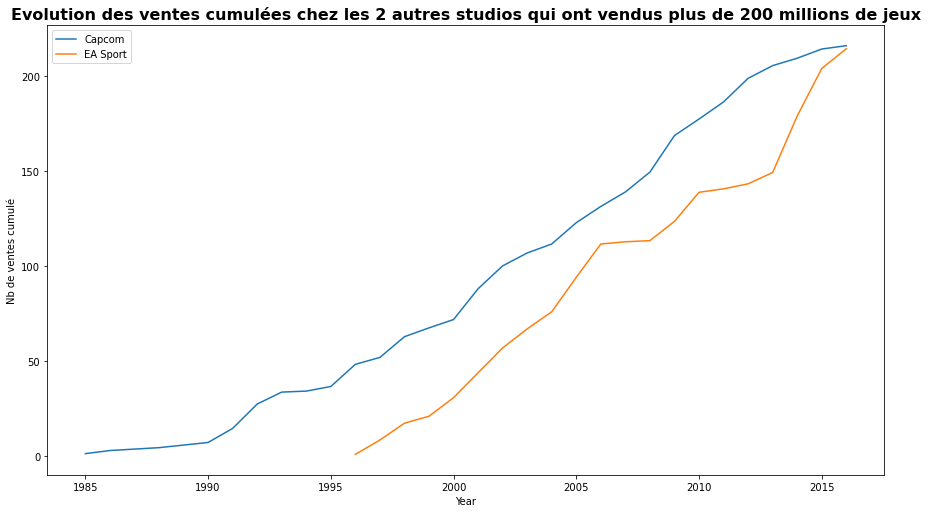

In [86]:
df_capcom = df[df['Studio'].str.contains('Capcom', na=False)].sort_values(by=['DateSortie'])
df_capcom = df_capcom.groupby('Year').agg({'Global_Sales': 'sum'}).reset_index().sort_values(by='Year')
df_capcom['GS_cum'] = df_capcom['Global_Sales'].cumsum()

df_easport = df[df['Studio'].str.contains('EA Sport', na=False)].sort_values(by=['DateSortie'])
df_easport = df_easport.groupby('Year').agg({'Global_Sales': 'sum'}).reset_index().sort_values(by='Year')
df_easport['GS_cum'] = df_easport['Global_Sales'].cumsum()

fig, ax = plt.subplots()
fig.set_size_inches(15, 8.27)
df_capcom.plot(x='Year', y='GS_cum', label='Capcom', ax=ax)
df_easport.plot(x='Year', y='GS_cum', label='EA Sport', ax=ax)

plt.ylabel('Nb de ventes cumulé')
plt.legend()
plt.title("Evolution des ventes cumulées chez les 2 autres studios qui ont vendus plus de 200 millions de jeux", weight='bold', fontsize=16);

# ANALYSE PAR JEU

## Top 50 des jeux les mieux notés comparé à leur nb de ventes

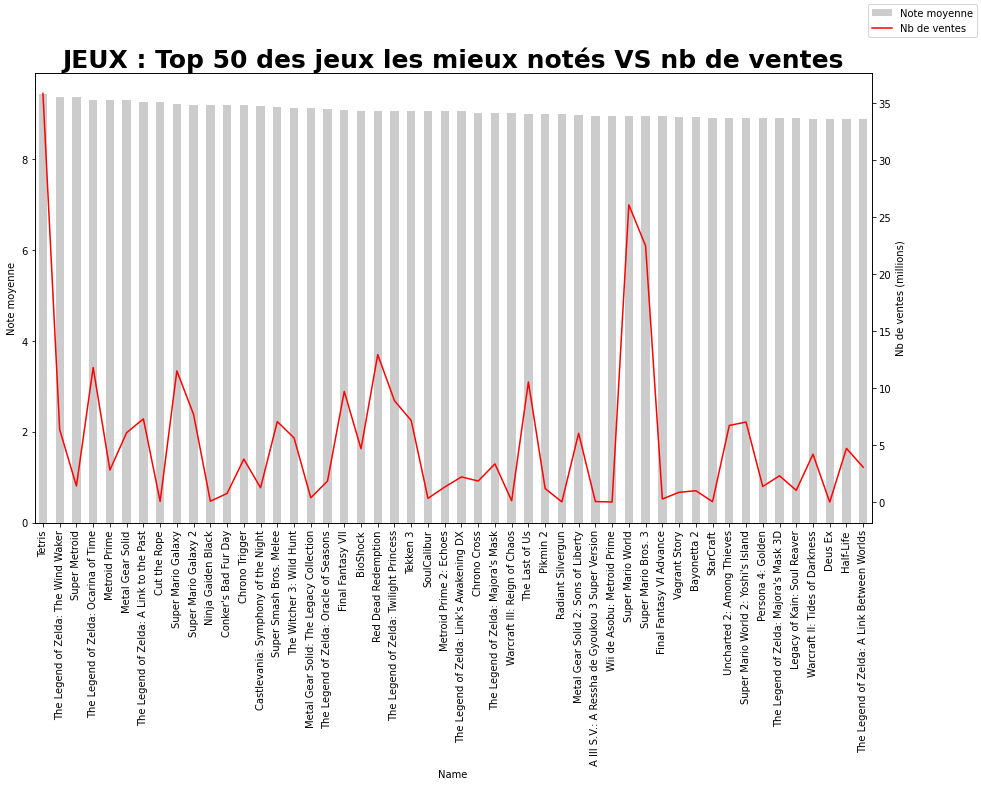

In [87]:
df_jeux = df.groupby('Name').agg({'Global_Sales': 'sum', 'Score': 'mean', 'Rate':'mean'}).reset_index()
df_jeux['Score_Rate'] = (df_jeux['Score'] + df_jeux['Rate']) / 2
df_jeux = df_jeux.sort_values(by = ['Score_Rate'], ascending=False)

fig, ax = plt.subplots()
fig.set_size_inches(15, 8.27)
ax2 = plt.twinx()

df_jeux.head(50).plot.bar(
    x='Name',
    y='Score_Rate',
    ax=ax,
    color='0.8',
    ylabel='Note moyenne',
    label='Note moyenne',
    legend=None
)

df_jeux.head(50).plot(
    x='Name',
    y='Global_Sales',
    ax=ax2,
    c='red',
    ylabel='Nb de ventes (millions)',
    label='Nb de ventes',
    legend=None
)

lines = []
labels = []

for ax in fig.axes:
    axLine, axLabel = ax.get_legend_handles_labels()
    lines.extend(axLine)
    labels.extend(axLabel)

fig.legend(lines, labels,           
           loc = 'upper right')

plt.title('JEUX : Top 50 des jeux les mieux notés VS nb de ventes', weight='bold', fontsize=25);

## TOP 50 des jeux qui vendent le plus comparé à leur note moyenne

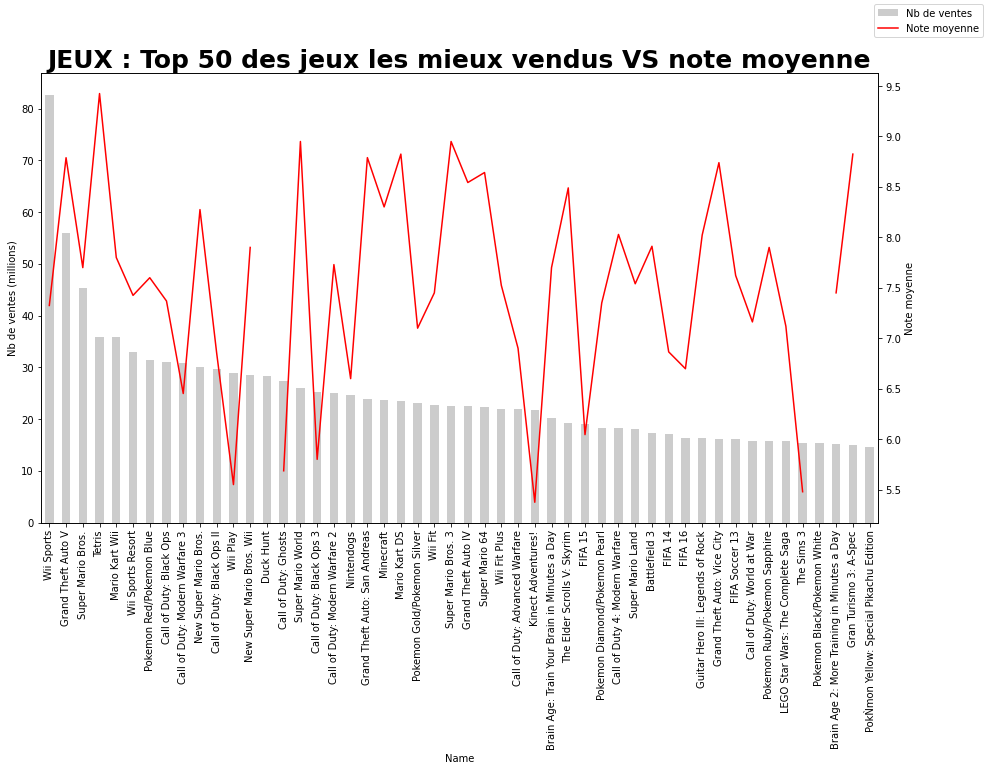

In [88]:
df_jeux = df.groupby('Name').agg({'Global_Sales': 'sum', 'Score': 'mean', 'Rate':'mean'}).reset_index().sort_values(by = ['Global_Sales'], ascending=False)
df_jeux['Score_Rate'] = (df_jeux['Score'] + df_jeux['Rate']) / 2

fig, ax = plt.subplots()
fig.set_size_inches(15, 8.27)
ax2 = plt.twinx()

df_jeux.head(50).plot.bar(
    x='Name',
    y='Global_Sales',
    ax=ax,
    color='0.8',
    ylabel='Nb de ventes (millions)',
    label='Nb de ventes',
    legend=None
)

df_jeux.head(50).plot(
    x='Name',
    y='Score_Rate',
    ax=ax2,
    c='red',
    ylabel='Note moyenne',
    label='Note moyenne',
    legend=None
)

lines = []
labels = []

for ax in fig.axes:
    axLine, axLabel = ax.get_legend_handles_labels()
    lines.extend(axLine)
    labels.extend(axLabel)

fig.legend(lines, labels,           
           loc = 'upper right')

plt.title('JEUX : Top 50 des jeux les mieux vendus VS note moyenne', weight='bold', fontsize=25);

## Top 50 des jeux les mieux vendus comparé à leur nb de reviews

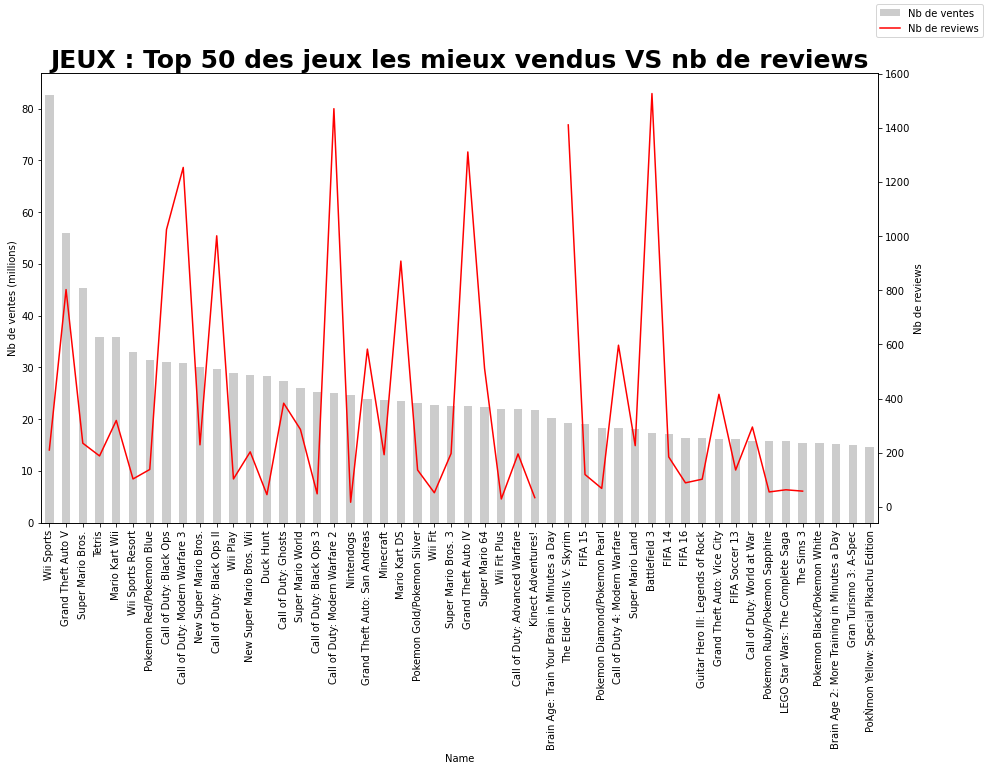

In [89]:
df_jeux = df.groupby('Name').agg({'Global_Sales': 'sum', 'Review': 'mean'}).reset_index().sort_values(by = ['Global_Sales'], ascending=False)

fig, ax = plt.subplots()
fig.set_size_inches(15, 8.27)
ax2 = plt.twinx()

df_jeux.head(50).plot.bar(
    x='Name',
    y='Global_Sales',
    ax=ax,
    color='0.8',
    ylabel='Nb de ventes (millions)',
    label='Nb de ventes',
    legend=None
)

df_jeux.head(50).plot(
    x='Name',
    y='Review',
    ax=ax2,
    c='red',
    ylabel='Nb de reviews',
    label='Nb de reviews',
    legend=None
)

lines = []
labels = []

for ax in fig.axes:
    axLine, axLabel = ax.get_legend_handles_labels()
    lines.extend(axLine)
    labels.extend(axLabel)

fig.legend(lines, labels,           
           loc = 'upper right')

plt.title('JEUX : Top 50 des jeux les mieux vendus VS nb de reviews', weight='bold', fontsize=25);

# ANALYSE DES CORRÉLATIONS DES VARIABLES SUR LE NB DE VENTES

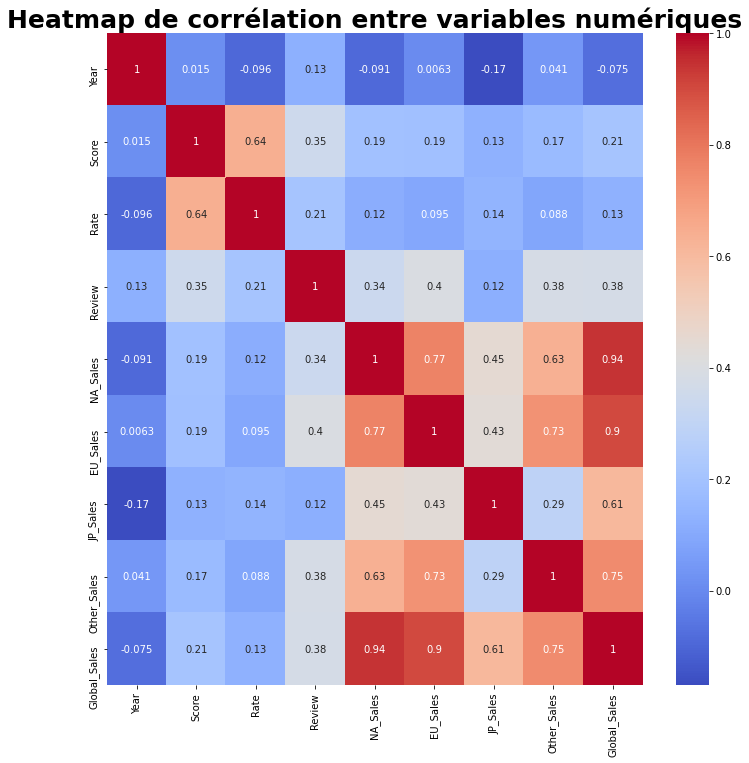

In [90]:
cor = df.corr()

fig, ax = plt.subplots(figsize=(12,12))

sns.heatmap(
    cor, 
    annot=True,
    ax=ax, 
    cmap='coolwarm'
)
plt.title('Heatmap de corrélation entre variables numériques', weight='bold', fontsize=25);

## Le nb de reviews influencent-il le nb de ventes ?

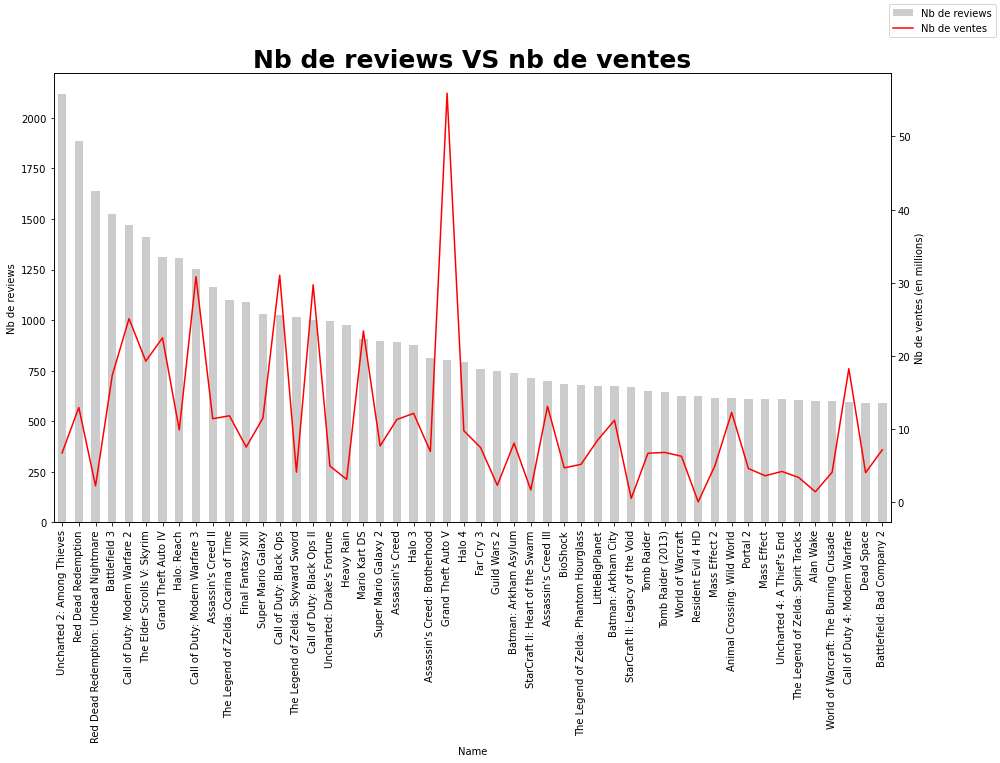

In [91]:
df_review = df.groupby('Name').agg({'Review': 'mean', 'Global_Sales': 'sum'}).reset_index().sort_values(by = ['Review'], ascending=False)

fig, ax = plt.subplots()
fig.set_size_inches(15, 8.27)
ax2 = plt.twinx()

df_review.head(50).plot.bar(
    x='Name',
    y='Review',
    ax=ax,
    color='0.8',
    ylabel='Nb de reviews',
    label='Nb de reviews',
    legend=None
)

df_review.head(50).plot(
    x='Name',
    y='Global_Sales',
    ax=ax2,
    c='red',
    ylabel='Nb de ventes (en millions)',
    label='Nb de ventes',
    legend=None
)

lines = []
labels = []

for ax in fig.axes:
    axLine, axLabel = ax.get_legend_handles_labels()
    lines.extend(axLine)
    labels.extend(axLabel)

fig.legend(lines, labels,           
           loc = 'upper right')

plt.title('Nb de reviews VS nb de ventes', weight='bold', fontsize=25);